In [1]:
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
results1_path = os.path.join('/Volumes/pss',
                             'fits/neurocorr',
                             'exp3_1_values_pvc11_50_1000_1000.h5')
results2_path = os.path.join('/Volumes/pss',
                             'fits/neurocorr',
                             'exp3_2_values_pvc11_50_1000_1000.h5')

In [3]:
results1 = h5py.File(results1_path, 'r')
results2 = h5py.File(results2_path, 'r')

In [4]:
list(results1)

['v_lfi', 'v_r_lfi', 'v_r_sdkl', 'v_s_lfi', 'v_s_sdkl', 'v_sdkl']

In [28]:
v_r_lfi1.shape

(49, 12000, 1000)

In [5]:
v_lfi1 = results1['v_lfi']
v_s_lfi1 = results1['v_s_lfi']
v_r_lfi1 = results1['v_r_lfi']
v_sdkl1 = results1['v_sdkl']
v_s_sdkl1 = results1['v_s_sdkl']
v_r_sdkl1 = results1['v_r_sdkl']

In [6]:
v_lfi2 = results2['v_lfi']
v_s_lfi2 = results2['v_s_lfi']
v_r_lfi2 = results2['v_r_lfi']
v_sdkl2 = results2['v_sdkl']
v_s_sdkl2 = results2['v_s_sdkl']
v_r_sdkl2 = results2['v_r_sdkl']

In [8]:
dims = np.arange(v_lfi1.shape[0]) + 2
n_dims = dims.size
_, n_dimlet_stim_combos, n_repeats = v_s_lfi1.shape

# Results of LFI/sDKL

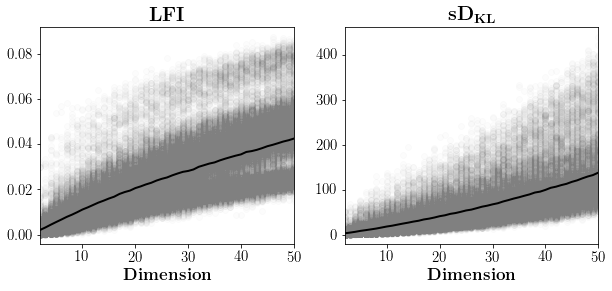

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for idx in range(0, 12000, 10):
    axes[0].scatter(dims, v_lfi1[:, idx], color='gray', alpha=0.025)
    axes[1].scatter(dims, v_sdkl1[:, idx], color='gray', alpha=0.025)

axes[0].plot(dims, np.mean(v_lfi1, axis=1), color='black', linewidth=2)
axes[1].plot(dims, np.mean(v_sdkl1, axis=1), color='black', linewidth=2)

for ax in axes:
    ax.set_xlim([2, 50])
    ax.tick_params(labelsize=15)
    ax.set_xlabel(r'\textbf{Dimension}', fontsize=17)
    
axes[0].set_title(r'\textbf{LFI}', fontsize=20)
axes[1].set_title(r'\textbf{sD}\textsubscript{\textbf{KL}}', fontsize=20)
plt.show()

In [ ]:
# 2d hexbin

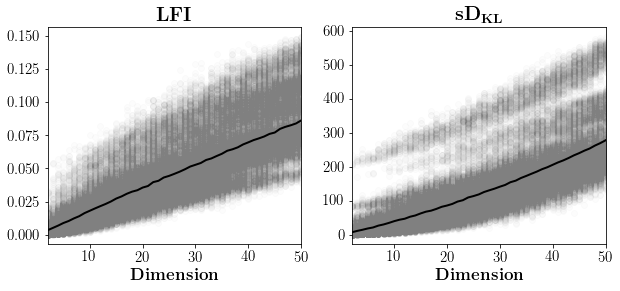

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for idx in range(0, 12000, 10):
    axes[0].scatter(dims, v_lfi2[:, idx], color='gray', alpha=0.025)
    axes[1].scatter(dims, v_sdkl2[:, idx], color='gray', alpha=0.025)

axes[0].plot(dims, np.mean(v_lfi2, axis=1), color='black', linewidth=2)
axes[1].plot(dims, np.mean(v_sdkl2, axis=1), color='black', linewidth=2)

for ax in axes:
    ax.set_xlim([2, 50])
    ax.tick_params(labelsize=15)
    ax.set_xlabel(r'\textbf{Dimension}', fontsize=17)
    
axes[0].set_title(r'\textbf{LFI}', fontsize=20)
axes[1].set_title(r'\textbf{sD}\textsubscript{\textbf{KL}}', fontsize=20)
plt.show()

# Scatter of Dimlet Distributions

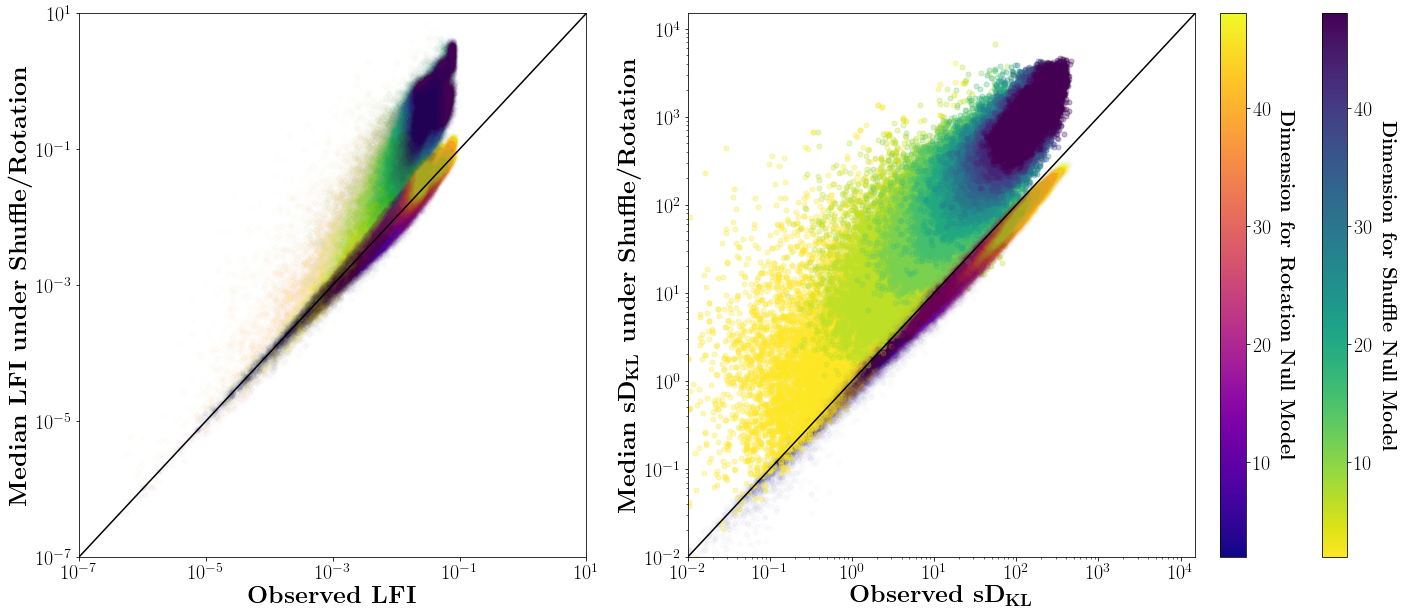

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

plot_dims = np.array([0, 3, 8, 13, 18, 23, 28, 33, 38, 43, 48])

for idx, dim_idx in enumerate(plot_dims):
    color_s = plt.get_cmap('plasma')(int(idx / (plot_dims.size - 1) * 255))
    color_r = plt.get_cmap('viridis_r')(int(idx / (plot_dims.size - 1) * 255))
    axes[0].scatter(
        v_lfi1[dim_idx],
        np.percentile(v_s_lfi1[dim_idx], q=50, axis=1),
        s=25,
        color=color_s,
        alpha=0.01
    )
    axes[0].scatter(
        v_lfi1[dim_idx],
        np.percentile(v_r_lfi1[dim_idx], q=50, axis=1),
        s=25,
        color=color_r,
        alpha=0.01
    )
    axes[1].scatter(
        v_sdkl1[dim_idx],
        np.percentile(v_s_sdkl1[dim_idx], q=50, axis=1),
        s=25,
        color=color_s,
        alpha=0.01
    )
    axes[1].scatter(
        v_sdkl1[dim_idx],
        np.percentile(v_r_sdkl1[dim_idx], q=50, axis=1),
        s=25,
        color=color_r,
        alpha=0.3
    )

# colorbars
[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb1 = fig.colorbar(
    mpl.cm.ScalarMappable(
        norm=mpl.colors.Normalize(vmin=2, vmax=plot_dims.max()),
        cmap="plasma"
    ),
    cax=cax1)
cb1.ax.tick_params(labelsize=20)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax2 = fig.add_axes([x1 + 0.25 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb2 = fig.colorbar(
    mpl.cm.ScalarMappable(
        norm=mpl.colors.Normalize(vmin=2, vmax=plot_dims.max()),
        cmap="viridis_r"
    ),
    cax=cax2)
cb2.ax.tick_params(labelsize=20)

# labels
axes[0].set_xlabel(r'\textbf{Observed LFI}')
axes[0].set_ylabel(r'\textbf{Median LFI under Shuffle/Rotation}')
axes[1].set_xlabel(r'\textbf{Observed sD}\textsubscript{\textbf{KL}}')
axes[1].set_ylabel(r'\textbf{Median sD}\textsubscript{\textbf{KL}}\textbf{ under Shuffle/Rotation}')

axes[0].set_xlim([1e-7, 1e1])
axes[0].set_ylim([1e-7, 1e1])
axes[1].set_xlim([1e-2, 1.5e4])
axes[1].set_ylim([1e-2, 1.5e4])

cb1.ax.set_ylabel(r'\textbf{Dimension for Rotation Null Model}', labelpad=23, fontsize=20, rotation=270)
cb2.ax.set_ylabel(r'\textbf{Dimension for Shuffle Null Model}', labelpad=23, fontsize=20, rotation=270)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(ax.get_xlim(), ax.get_ylim(), color='k')

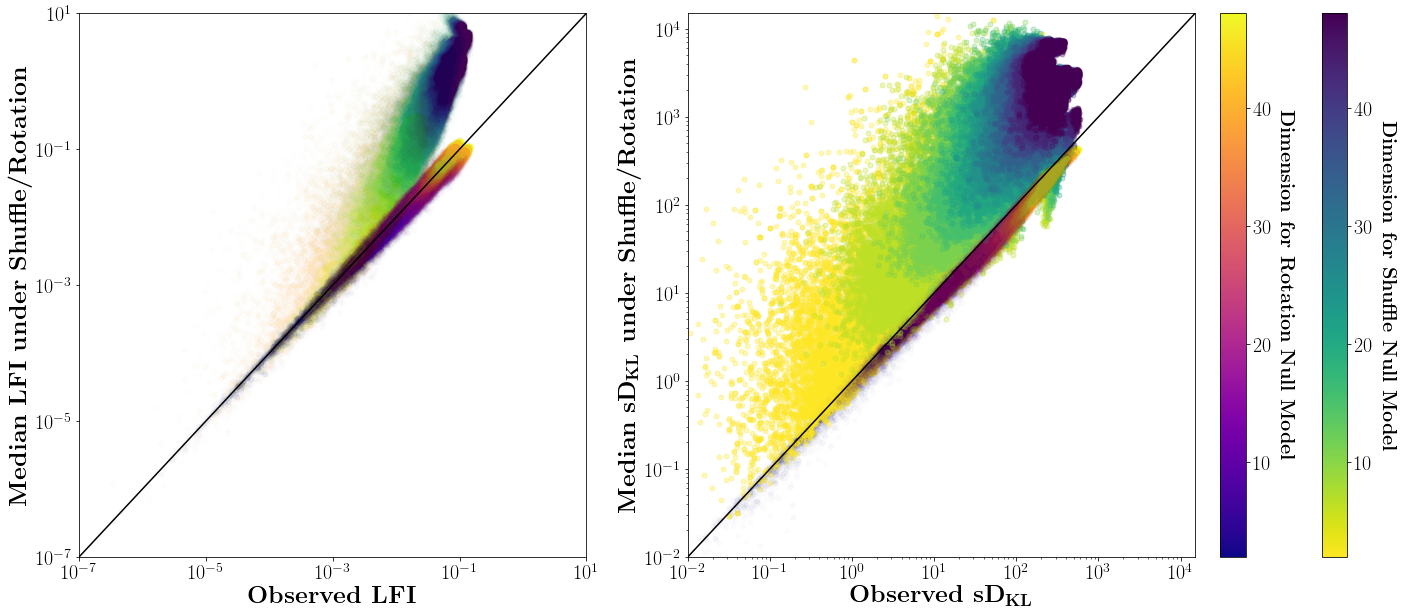

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

plot_dims = np.array([0, 3, 8, 13, 18, 23, 28, 33, 38, 43, 48])

for idx, dim_idx in enumerate(plot_dims):
    color_s = plt.get_cmap('plasma')(int(idx / (plot_dims.size - 1) * 255))
    color_r = plt.get_cmap('viridis_r')(int(idx / (plot_dims.size - 1) * 255))
    axes[0].scatter(
        v_lfi2[dim_idx],
        np.percentile(v_s_lfi2[dim_idx], q=50, axis=1),
        s=25,
        color=color_s,
        alpha=0.01
    )
    axes[0].scatter(
        v_lfi2[dim_idx],
        np.percentile(v_r_lfi2[dim_idx], q=50, axis=1),
        s=25,
        color=color_r,
        alpha=0.01
    )
    axes[1].scatter(
        v_sdkl2[dim_idx],
        np.percentile(v_s_sdkl2[dim_idx], q=50, axis=1),
        s=25,
        color=color_s,
        alpha=0.01
    )
    axes[1].scatter(
        v_sdkl2[dim_idx],
        np.percentile(v_r_sdkl2[dim_idx], q=50, axis=1),
        s=25,
        color=color_r,
        alpha=0.3
    )

# colorbars
[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb1 = fig.colorbar(
    mpl.cm.ScalarMappable(
        norm=mpl.colors.Normalize(vmin=2, vmax=plot_dims.max()),
        cmap="plasma"
    ),
    cax=cax1)
cb1.ax.tick_params(labelsize=20)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax2 = fig.add_axes([x1 + 0.25 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb2 = fig.colorbar(
    mpl.cm.ScalarMappable(
        norm=mpl.colors.Normalize(vmin=2, vmax=plot_dims.max()),
        cmap="viridis_r"
    ),
    cax=cax2)
cb2.ax.tick_params(labelsize=20)

# labels
axes[0].set_xlabel(r'\textbf{Observed LFI}')
axes[0].set_ylabel(r'\textbf{Median LFI under Shuffle/Rotation}')
axes[1].set_xlabel(r'\textbf{Observed sD}\textsubscript{\textbf{KL}}')
axes[1].set_ylabel(r'\textbf{Median sD}\textsubscript{\textbf{KL}}\textbf{ under Shuffle/Rotation}')

axes[0].set_xlim([1e-7, 1e1])
axes[0].set_ylim([1e-7, 1e1])
axes[1].set_xlim([1e-2, 1.5e4])
axes[1].set_ylim([1e-2, 1.5e4])

cb1.ax.set_ylabel(r'\textbf{Dimension for Rotation Null Model}', labelpad=23, fontsize=20, rotation=270)
cb2.ax.set_ylabel(r'\textbf{Dimension for Shuffle Null Model}', labelpad=23, fontsize=20, rotation=270)

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(ax.get_xlim(), ax.get_ylim(), color='k')

# Cumulative Histogram at Percentiles

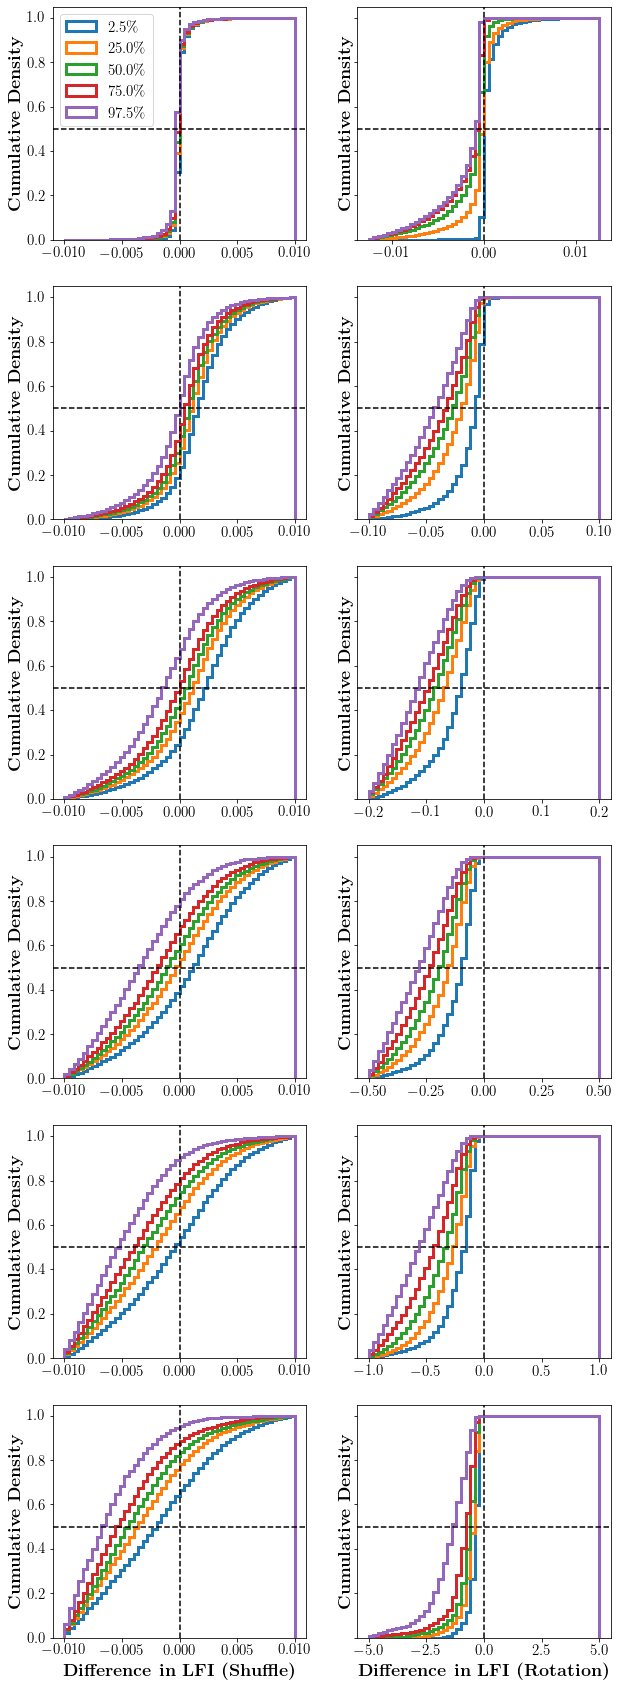

In [22]:
fig, axes = plt.subplots(6, 2, figsize=(10, 30), sharey=True)

dim_idxs = np.array([0, 8, 18, 28, 38, 48])
percentiles = np.array([2.5, 25, 50, 75, 97.5])

bins = (
    np.linspace(-0.0125, 0.0125, 51),
    np.linspace(-0.1, 0.1, 51),
    np.linspace(-0.2, 0.2, 51),
    np.linspace(-0.5, 0.5, 51),
    np.linspace(-1, 1, 51),
    np.linspace(-5, 5, 51)
)

for idx, dim_idx in enumerate(dim_idxs):
    for percentile in percentiles:
        axes[idx, 0].hist(
            v_lfi1[dim_idx] - np.percentile(v_s_lfi1[dim_idx], percentile, -1),
            cumulative=True,
            density=True,
            bins=np.linspace(-0.01, 0.01, 51),
            histtype='step',
            label=f'{percentile}\%',
            linewidth=3)

        axes[idx, 1].hist(
            v_lfi1[dim_idx] - np.percentile(v_r_lfi1[dim_idx], percentile, -1),
            cumulative=True,
            density=True,
            bins=bins[idx],
            histtype='step',
            linewidth=3)

for ax in axes.ravel():
    ax.axhline(0.5, linestyle='--', color='black')
    ax.axvline(0, linestyle='--', color='black')
    ax.tick_params(labelsize=15)
    ax.set_ylabel(r'\textbf{Cumulative Density}', fontsize=18)

axes[-1, 0].set_xlabel(r'\textbf{Difference in LFI (Shuffle)}', fontsize=18)
axes[-1, 1].set_xlabel(r'\textbf{Difference in LFI (Rotation)}', fontsize=18)
axes[0, 0].legend(loc=2, prop={'size': 15})

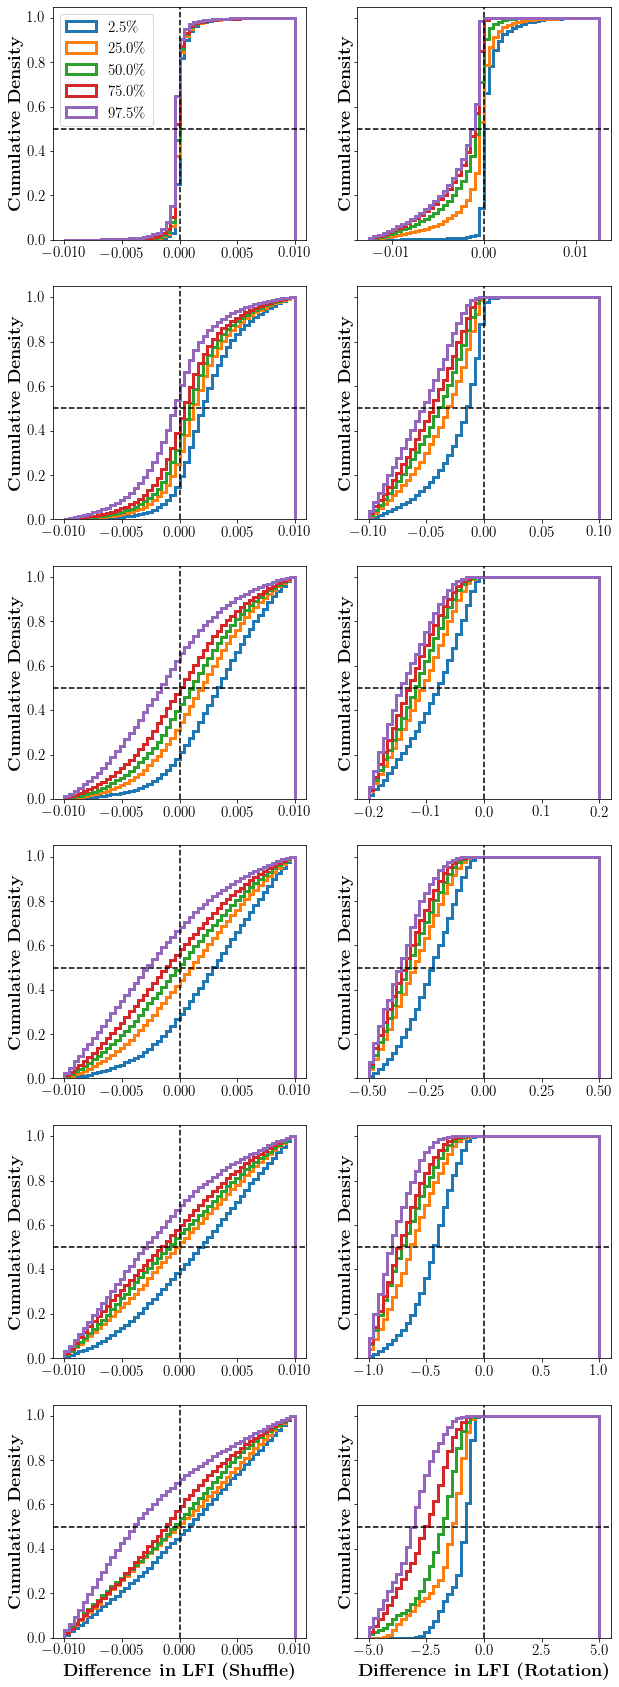

In [23]:
fig, axes = plt.subplots(6, 2, figsize=(10, 30), sharey=True)

dim_idxs = np.array([0, 8, 18, 28, 38, 48])
percentiles = np.array([2.5, 25, 50, 75, 97.5])

bins = (
    np.linspace(-0.0125, 0.0125, 51),
    np.linspace(-0.1, 0.1, 51),
    np.linspace(-0.2, 0.2, 51),
    np.linspace(-0.5, 0.5, 51),
    np.linspace(-1, 1, 51),
    np.linspace(-5, 5, 51)
)

for idx, dim_idx in enumerate(dim_idxs):
    for percentile in percentiles:
        axes[idx, 0].hist(
            v_lfi2[dim_idx] - np.percentile(v_s_lfi2[dim_idx], percentile, -1),
            cumulative=True,
            density=True,
            bins=np.linspace(-0.01, 0.01, 51),
            histtype='step',
            label=f'{percentile}\%',
            linewidth=3)

        axes[idx, 1].hist(
            v_lfi2[dim_idx] - np.percentile(v_r_lfi2[dim_idx], percentile, -1),
            cumulative=True,
            density=True,
            bins=bins[idx],
            histtype='step',
            linewidth=3)

for ax in axes.ravel():
    ax.axhline(0.5, linestyle='--', color='black')
    ax.axvline(0, linestyle='--', color='black')
    ax.tick_params(labelsize=15)
    ax.set_ylabel(r'\textbf{Cumulative Density}', fontsize=18)

axes[-1, 0].set_xlabel(r'\textbf{Difference in LFI (Shuffle)}', fontsize=18)
axes[-1, 1].set_xlabel(r'\textbf{Difference in LFI (Rotation)}', fontsize=18)
axes[0, 0].legend(loc=2, prop={'size': 15})

# Behavior of Zero-Crossings across Dimensions

In [24]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
n_percentiles = percentiles.size

dim_crossings_s1 = np.zeros((n_dims, n_percentiles))
dim_crossings_r1 = np.zeros((n_dims, n_percentiles))
dim_crossings_s2 = np.zeros((n_dims, n_percentiles))
dim_crossings_r2 = np.zeros((n_dims, n_percentiles))

for dim_idx, dim in enumerate(dims):
    for idx, percentile in enumerate(percentiles):
        dim_crossings_s1[dim_idx, idx] = np.count_nonzero(
            (v_lfi1[dim_idx] - np.percentile(v_s_lfi1[dim_idx], percentile, -1)) < 0
        ) / n_dimlet_stim_combos
        dim_crossings_r1[dim_idx, idx] = np.count_nonzero(
            (v_lfi1[dim_idx] - np.percentile(v_r_lfi1[dim_idx], percentile, -1)) < 0
        ) / n_dimlet_stim_combos

        dim_crossings_s2[dim_idx, idx] = np.count_nonzero(
            (v_lfi2[dim_idx] - np.percentile(v_s_lfi2[dim_idx], percentile, -1)) < 0
        ) / n_dimlet_stim_combos
        dim_crossings_r2[dim_idx, idx] = np.count_nonzero(
            (v_lfi2[dim_idx] - np.percentile(v_r_lfi2[dim_idx], percentile, -1)) < 0
        ) / n_dimlet_stim_combos

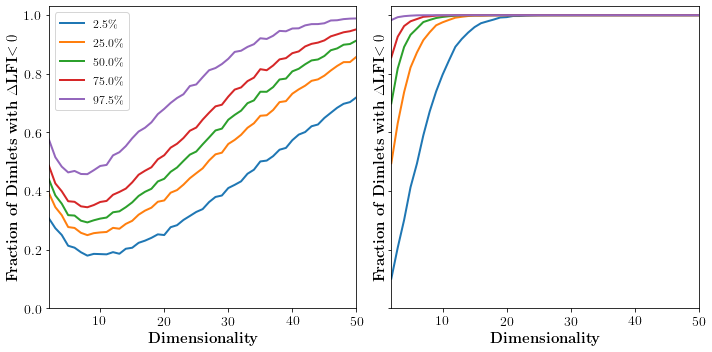

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

for idx, percentile in enumerate(percentiles):
    axes[0].plot(dims, dim_crossings_s1[:, idx], linewidth=2, label=f'{percentile}\%')
    axes[1].plot(dims, dim_crossings_r1[:, idx], linewidth=2)
    
for ax in axes:
    ax.set_ylim([0, 1])
    ax.tick_params(labelsize=14)
    ax.set_xlim([2, 50])
    ax.set_ylim([0, 1.03])
    ax.set_xlabel(r'\textbf{Dimensionality}', fontsize=15)
    ax.set_ylabel(r'\textbf{Fraction of Dimlets with} $\Delta$\textbf{LFI}$<0$', fontsize=15)
    
axes[0].legend(loc=2, prop={'size': 12})

plt.tight_layout()

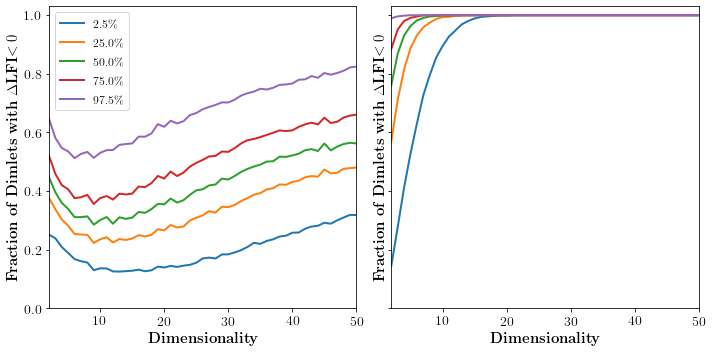

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

for idx, percentile in enumerate(percentiles):
    axes[0].plot(dims, dim_crossings_s2[:, idx], linewidth=2, label=f'{percentile}\%')
    axes[1].plot(dims, dim_crossings_r2[:, idx], linewidth=2)
    
for ax in axes:
    ax.set_ylim([0, 1])
    ax.tick_params(labelsize=14)
    ax.set_xlim([2, 50])
    ax.set_ylim([0, 1.03])
    ax.set_xlabel(r'\textbf{Dimensionality}', fontsize=15)
    ax.set_ylabel(r'\textbf{Fraction of Dimlets with} $\Delta$\textbf{LFI}$<0$', fontsize=15)
    
axes[0].legend(loc=2, prop={'size': 12})

plt.tight_layout()